In [20]:
import json
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

In [3]:
jdata = json.load(open('data/train/RapidVPData_6918609_693027.json'))
for key in jdata:
    print(key)

EventNumber
MCParticles
MCVertices
RunNumber
VPClusters
VeloTracks


In [4]:
VeloTracks  = jdata['VeloTracks']
VeloHits  = jdata['VPClusters']
mcps = jdata['MCParticles']
mcvs = jdata['MCVertices']

In [6]:
vs =  list(VeloTracks.values())[0]
def getPVParams(track, mcps, mcvs):
    """ Given a track dict, the list of MCParticles and MCVertices 
    return the track PV position and ID (or None if not found or ambiguous)"""
    track_mcps = track['MCPs']
    # We ignore the tracks with no association to MCP or more than one
    if len(track_mcps) != 1:
        return None
    track_mcp = mcps[track_mcps[0]]
    track_pv_id = track_mcp['PV']
    track_pv = mcvs[track_pv_id]
    pos = track_pv['Pos']
    return pos[0], pos[1], pos[2], track_pv['key']

print(vs, getPVParams(vs, mcps, mcvs))

{'ClosestToBeam': [0.01643084393756844, -0.030428914618081393, 21.892009735107422, 0.004823623690754175, -0.010355439968407154, 0.0], 'LHCbIDs': ['2193111806', '2195207147', '2197303265', '2199399639', '2201495757'], 'MCPs': ['8917'], 'errCTBState': [0.006562070954433931, 0.006562070954433931, 2.2658468878944404e-08, 2.2658468878944404e-08, -1.2069097536892594e-05], 'isBackwards': False, 'key': '0'} (-0.0029, 0.0246, 18.7183, '333')


In [55]:

#tmp = list(VeloTracks.values())[0]
def getTrackFirstHitZ(track, hits):
    """ Returns the z of the first hit for the given track """
    return min( hits[h]['z'] for h in track['LHCbIDs'])

#print(getTrackFirstHitZ(tmp, VeloHits))
        

{'ClosestToBeam': [0.01643084393756844, -0.030428914618081393, 21.892009735107422, 0.004823623690754175, -0.010355439968407154, 0.0], 'LHCbIDs': ['2193111806', '2195207147', '2197303265', '2199399639', '2201495757'], 'MCPs': ['8917'], 'errCTBState': [0.006562070954433931, 0.006562070954433931, 2.2658468878944404e-08, 2.2658468878944404e-08, -1.2069097536892594e-05], 'isBackwards': False, 'key': '0'}
500.58099365234375


Dataframe creation
===============

Create data frame that contains the velo tracks params as well as the position of the associated PV and its ID

In [58]:
ctbs = []
for  l in VeloTracks.values():
    pvps = getPVParams(l, mcps, mcvs)
    if pvps != None:
        ctbs.append(l['ClosestToBeam'] + list(pvps) + [len(l['LHCbIDs'])] + [(getTrackFirstHitZ(l, VeloHits))])


df = pd.DataFrame.from_records(ctbs, columns=['x', 'y', 'z', 'tx', 'ty', 'qp', 'pvx', 'pvy', 'pvz', 
                                              'pvid', 'LHCbIDCount', 'first_hit_Z'])
df

,x,y,z,tx,ty,qp,pvx,pvy,pvz,pvid,LHCbIDCount,first_hit_Z
0,0.016431,-0.030429,21.892010,0.004824,-0.010355,0.0,-0.0029,0.0246,18.7183,333,5,500.580994
1,-0.029437,-0.022747,2.572620,0.006725,-0.011902,0.0,-0.0186,0.0362,-2.1009,626,6,400.580994
2,0.016616,0.020711,52.831165,0.013265,-0.011625,0.0,0.0461,-0.0051,50.7438,670,6,400.580994
3,0.038009,-0.048609,145.443771,-0.011904,-0.015016,0.0,0.0021,-0.0178,147.0323,1109,5,486.919006
4,-0.023007,-0.006625,48.374020,-0.014196,-0.018320,0.0,-0.0309,0.0339,49.0673,829,7,311.919006
5,-0.125423,0.127085,49.180435,-0.012795,-0.019018,0.0,-0.0309,0.0339,49.0673,829,7,311.919006
6,-0.021399,0.054181,143.642532,-0.013950,-0.021046,0.0,0.0021,-0.0178,147.0323,1109,6,386.919006
7,0.042134,-0.042651,147.422226,-0.010266,-0.026449,0.0,0.0021,-0.0178,147.0323,1109,6,386.919006
8,0.009775,-0.001258,22.868593,-0.004272,-0.013226,0.0,-0.0029,0.0246,18.7183,333,5,486.919006
9,0.076718,0.049729,139.582367,-0.006200,-0.021368,0.0,0.0021,-0.0178,147.0323,1109,5,486.919006


In [24]:
mcvs

{'0': {'Pos': [-0.0095, 0.0023, -40.511], 'key': '0', 'products': 3},
 '1001': {'Pos': [0.0188, 0.0274, 24.0869], 'key': '1001', 'products': 85},
 '1109': {'Pos': [0.0021, -0.0178, 147.0323], 'key': '1109', 'products': 95},
 '253': {'Pos': [-0.0373, 0.0104, -88.1885], 'key': '253', 'products': 69},
 '333': {'Pos': [-0.0029, 0.0246, 18.7183], 'key': '333', 'products': 186},
 '5': {'Pos': [0.0013, 0.0201, 158.2288], 'key': '5', 'products': 198},
 '570': {'Pos': [0.0461, 0.0352, 33.4059], 'key': '570', 'products': 18},
 '626': {'Pos': [-0.0186, 0.0362, -2.1009], 'key': '626', 'products': 31},
 '670': {'Pos': [0.0461, -0.0051, 50.7438], 'key': '670', 'products': 125},
 '829': {'Pos': [-0.0309, 0.0339, 49.0673], 'key': '829', 'products': 155}}

Check the impact of the number of hits in one track
===============

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30a28d1eb8>]],
      dtype=object)

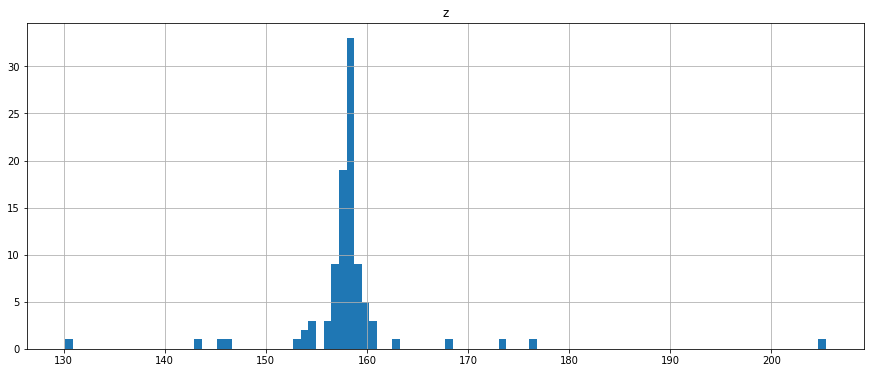

In [48]:
df[ (df.pvid == '5') & (df.LHCbIDCount > 4) ].hist('z', bins=100)

Distribution of the Z position for the first hit
========================

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30a233a438>]],
      dtype=object)

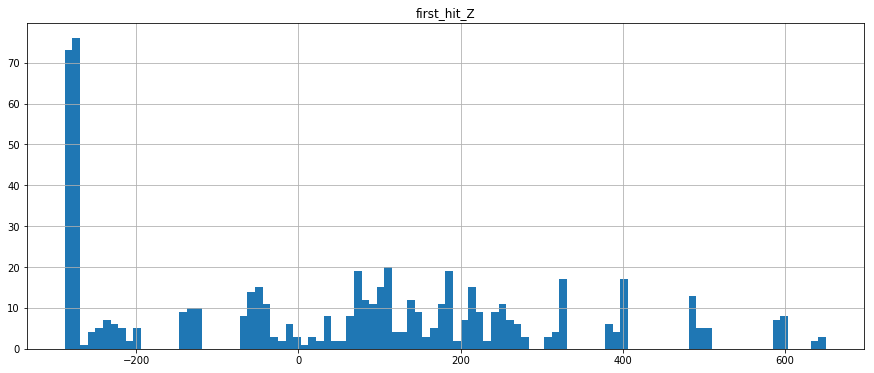

In [66]:
df.hist('first_hit_Z', bins=100)

(array([ 7., 34., 45., 40., 35., 20., 21., 22., 18., 24., 17., 31.,  9.,
        18.,  7., 18., 10., 11., 32., 35., 21., 28., 10.,  7., 10.,  2.,
         1., 29., 21.,  5.,  6.,  2.,  2.,  0.,  1.,  1.,  3.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([  6.25314331,  21.62543625,  36.99772919,  52.37002213,
         67.74231506,  83.114608  ,  98.48690094, 113.85919388,
        129.23148682, 144.60377975, 159.97607269, 175.34836563,
        190.72065857, 206.09295151, 221.46524445, 236.83753738,
        252.20983032, 267.58212326, 282.9544162 , 298.32670914,
        313.69900208, 329.07129501, 344.44358795, 359.81588089,
        375.18817383, 390.56046677, 405.9327597 , 421.30505264,
        436.67734558, 452.04963852, 467.42193146, 482.7942244 ,
        498.16651733, 513.53881027, 528.91110321, 544.28339615,
        559.65568909, 575.02798203, 590.40027496, 605.7725679 ,
        621.14486084, 636.51715378, 651.88944672, 667.26173965,
        682.

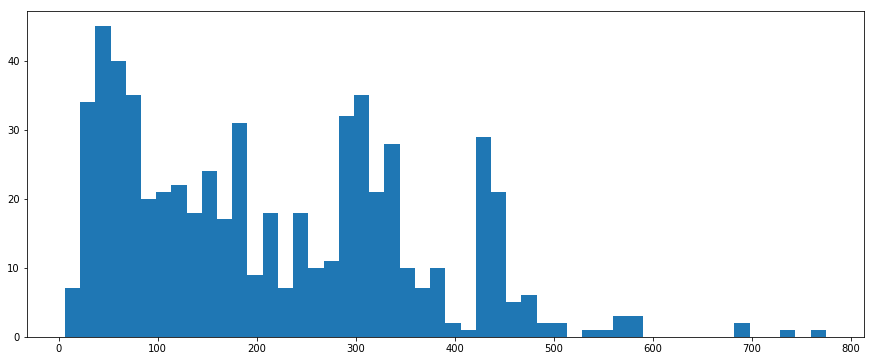

In [72]:
plt.hist(abs(df['z'] - df['first_hit_Z']), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30a1a1f898>]],
      dtype=object)

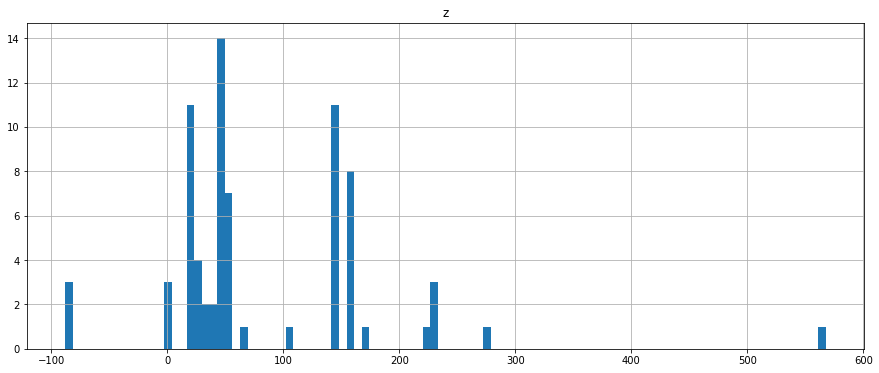

In [80]:
df[(abs(df.z - df.first_hit_Z) < 50)].hist('z', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30a1763f28>]],
      dtype=object)

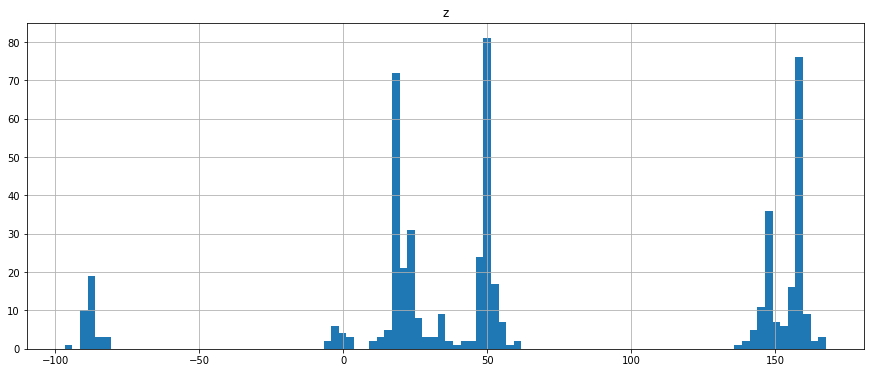

In [83]:
df[(abs(df.z - df.pvz) < 10)].hist('z', bins=100)